In [2]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
import matplotlib
import matplotlib.pyplot as plt

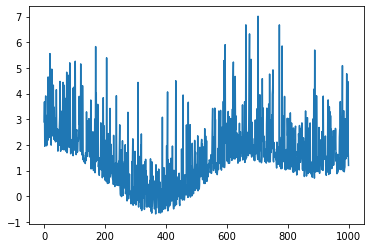

In [17]:
x = np.linspace(-np.pi, np.pi, 1000)
y1 = np.sin(x)
y2 = np.sin(2/3*(x-np.pi))
y3 = .5*np.sin(2*x)
#plt.plot(x, y1)
#plt.plot(x, y2)
baseTimes = np.arange(0, 1000)
baseValues = 1 + y1 + y2 + y3
baseValues += np.random.exponential(size=1000)
plt.plot(baseTimes, baseValues)


In [47]:
syntheticDfs = []
for i in range(20000):
    values = baseValues + np.random.normal(scale=5, size=baseValues.shape[0])
    sdf = pd.DataFrame({'ts': baseTimes, 'key': np.repeat(i, 1000), 'value': values})
    sdf['value'] = sdf['value'].astype(int)
    sdf.loc[sdf.value < 8, 'value'] = 0
    syntheticDfs.append(sdf)
synthetic = pd.concat(syntheticDfs, ignore_index=True)


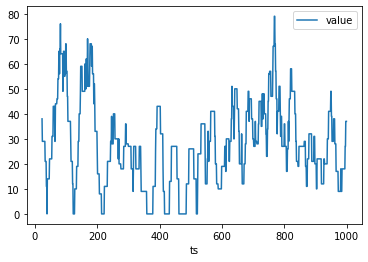

In [49]:
synthetic.query('key == 51').groupby('ts').aggregate({'value': np.mean}).rolling(24).sum().plot(y='value')

In [5]:
synthetic

,ts,key,value
0,0,0,8
1,1,0,9
2,2,0,3
3,3,0,4
4,4,0,0
...,...,...,...
19999995,995,19999,7
19999996,996,19999,0
19999997,997,19999,5
19999998,998,19999,8


In [50]:
synthetic.sort_values(by=['ts', 'key'], inplace=True)

In [51]:
synthetic.to_csv('/Users/dimitris/Documents/Workspaces/thesis-genealog-flink-experiments/sgb.csv', index=False, header=False)